In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore') # 문제가되지않는 일반적인 경고는 무시한다

In [2]:
# 사용할 필요한 데이터 가져옴 (보스턴집값데이터 사용)
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston['DESCR'])
# 데이터의 DESCR를 통해 506개의 인스턴스, 13개의 특성을 가지는것을 확인

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# 필요한 데이터 가져오기

data = boston.data  # data = boston['data'] 와 같은 의미임
label = boston.target
columns = boston.feature_names

In [5]:
data = pd.DataFrame(data, columns=columns) 
data.head()  # data.head() = 앞의5개만 데이터 불러온다

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.shape # (506, 13) : 전체데이터는 506개, columns는 13개

(506, 13)

In [7]:
# Simple Linear Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state= 2022) # test데이터는 전체에서 20%만 사용하겠다


In [8]:
# X_train['RM']   # 이 전체중에서 집값인 RM값만 이용하겠다
print(X_train['RM'].values) # 전체 데이터가 하나의 리스트에 들어있음
X_train['RM'].values.reshape(-1,1)[:5] # 데이터의 차원을 바꾸는 reshape함수를 이용, reshape(변경할 배열 행, 열)
                                       # -1은 원래 배열의 길이와 남은 차원으로 부터 추정하는데 사용
                                       # reshape(-1,1)은 열이 하나인 행렬로 변환

[7.454 6.315 6.382 5.942 8.247 6.604 5.414 7.148 6.525 6.38  5.683 5.871
 6.8   6.162 6.101 6.122 6.12  7.041 7.765 6.606 6.631 6.012 6.781 5.927
 6.152 6.376 6.749 6.301 5.88  6.174 5.856 6.333 6.415 7.61  6.182 5.935
 6.86  6.461 7.691 7.686 6.826 5.888 5.277 6.556 5.99  6.824 6.142 5.895
 6.219 7.024 8.704 6.216 8.259 6.031 6.728 6.286 7.274 6.358 6.153 6.144
 5.565 5.949 6.474 7.393 6.326 5.987 6.975 6.727 6.421 5.747 5.762 3.863
 6.047 6.437 6.202 7.287 6.108 5.468 5.869 6.395 6.02  5.663 6.245 6.066
 6.164 4.973 7.185 6.482 6.595 5.879 6.405 6.009 6.417 5.878 5.713 6.655
 5.822 6.431 6.563 6.03  5.854 5.936 7.163 6.24  6.727 6.433 6.015 5.594
 6.319 6.453 5.983 6.373 7.236 6.976 7.412 6.438 6.14  6.112 6.625 5.813
 5.807 6.113 6.251 6.037 6.739 5.57  6.114 6.021 6.98  6.169 6.326 6.616
 6.485 7.47  7.82  6.879 7.831 6.459 6.618 6.185 5.985 7.802 5.412 6.957
 6.842 5.628 6.816 6.758 5.186 6.471 6.417 6.425 6.968 5.854 7.185 5.885
 6.065 6.29  6.715 5.877 5.928 6.041 5.891 5.597 6.

array([[7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247]])

In [9]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [10]:
# 훈련시키기
# 방의 개수 "RM"과 label 값을 학습시킴
# RM 데이터는 변환과정이 필요
sim_lr.fit(X_train['RM'].values.reshape((-1,1)), y_train)

LinearRegression()

In [11]:
# 방의 갯수로 예측
y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1))
print(y_pred)

[21.45467216  1.37246769 18.86150431 32.34201811 16.3178244  20.75194347
 21.890166   15.83284262 12.91305439 13.76424689 22.06832257 18.55467911
 22.31576225 19.564233   18.51508876 31.15430764  9.90418788 11.43831389
 24.84954458 19.94034132 19.31679332 18.17857079  3.64891275 33.24269855
 26.56182717 42.53653295 23.69152688 17.65399867 24.06763519 26.03725505
 19.4157692  26.51233924 13.30895788 15.53591501 13.35844582 23.80040034
  8.97381468 21.5041601  23.17685234 47.31706758 18.77242603 16.96116757
 18.53488393 15.15980669 21.63282873 31.23348834 16.88198687 26.22530921
 23.81029792 23.53316548 23.78060516 15.20929463 30.57035    28.20482665
 25.41370705 10.02295892 20.87071452 21.890166   -4.33844014 15.86253538
 22.7413585  28.23451941 16.84239652 27.0072186  25.23555048 19.84136545
 31.0355366  21.54375045 21.22702766 23.11746682  8.71647741 15.56560777
 27.54168831 22.07822016 21.23692525 10.09224203 10.82466349 22.00893705
 18.33693219 26.98742342 16.76321582 27.66045935 22

In [12]:
# 결과 살펴보기
from sklearn.metrics import r2_score     # r2_score패키지 불러와서 R2값 별다른 코딩없이 알수있음
print('단순 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

# 실수형으로, :.4f = 전체의 실수 중 소수점 넷째자리까지
# r2_score(y_test, y_pred)에서 (y_test, y_pred)가 score에 영향미친다.(0.21)은 매우 형편없는 수치임

단순 선형 회귀, R2: 0.2121


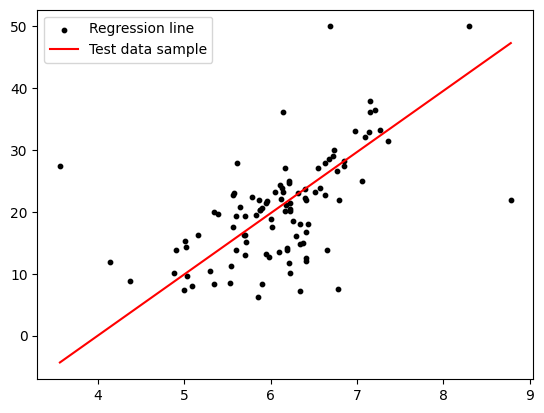

In [13]:
# 결과 시각화하기 :  matplotlib 사용

# x축은 방의갯수, y축은 값price
# 원래 전체 방 갯수(x_Test['RM'])보다 조금더 여유를 줌

line_x = np.linspace(min(X_test['RM']), np.max(X_test['RM']), 10) # 방의개수가 젤 적은것부터 젤 많은것까지의 범위를 생성, 점의개수는 10개 
line_y = sim_lr.predict(line_x.reshape(-1,1))   # 방의개수에대해 예측한결과가 y에 들어감

plt.scatter(X_test['RM'], y_test, s=10, c='black')  # x,y좌표들로 좌표에 size10 점들을 black으로 찍음
plt.plot(line_x, line_y, c='red')         
plt.legend(['Regression line','Test data sample'], loc = 'upper left')  # 왼쪽 위에 좌표설명 legend생성
# 빨간색선 기준으로 점들 더 흩어져있을수록 에러

# 결과값보면 거의 예측이 안되는걸 볼수있음

In [14]:
# Multiple Linear Regression 다중선형회귀를 위한 변수 만들기
mul_lr = LinearRegression()

# 모델을 학습시킴
mul_lr.fit(X_train, y_train)  # X_train, y_train => 전체column값 다 적용

LinearRegression()

In [15]:
y_pred = mul_lr.predict(X_test)

In [16]:
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))
# 결과 : 0.6226으로 앞선 모델보다 정확도는 3배이지만, 여전히 부족하다
# regression은 리니어한 데이터는 잘 적용되지만 아닌경우 적용하기 어려울 수 있다.

다중 선형 회귀, R2: 0.6226


In [17]:
# Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth = 10)   # max_depth=5 : 몇번째까지 tree 내려갈것인가 결정


In [18]:
# 학습시킴
dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train) # 학습시켜서 이차원배열로 가져와서, y_train으로 학습시킴

DecisionTreeRegressor(max_depth=10)

In [ ]:
# 예측하기
y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

In [ ]:
# 결과
print('단순 결정 트리 회귀 R2: {:4f}'.format(r2_score(y_test, y_pred)))

# 결과값 = linear agression 보다는 조금 높음(max_depth의 값을 증가시키면 결과값은 더 작아짐(낮아짐))
# max_depth에 따라서 성능이 바뀌는 이유 = depth가 높으면 학습데이터에 맞춰진 모델, 낮으면 일반화된 모델 만들어짐
# depth가 높다는것은 학습데이터와 1:1 로 매치됨 test데이터와는 안맞을 수 있음. 이증상을 overfitting이라고 함
# 적절한 depth값을 반복문을 통해 찾는것이 필요하다

단순 결정 트리 회귀 R2: 0.257860


In [ ]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
best_depth = 0
best_r2 = 0

# depth를 1부터 10까지 반복하는 반복문 만들어서 depth값에 따른 R2값 비교 

for depth in arr:  
  dt_regr = DecisionTreeRegressor(max_depth = depth)
  dt_regr.fit(X_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(X_test['RM'].values.reshape(-1,1))

  temp_r2 = r2_score(y_test, y_pred)
  # print('\n단순 결정 트리 회귀 depth={} R2: {:4f}'.format(depth, temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))

최적의 결과는 depth=3 r2=0.3931


In [ ]:
# 위의 코드는 집값 데이터에서 특성 'RM' 하나만 사용했지만, 아래부터는 전부 사용하는걸로 작성

dt_regr = DecisionTreeRegressor(max_depth=8)   # 데이터가 조금더 많으면 더 세세하므로, max_depth값 좀더 올려도 정확도 높게 나올수있음
dt_regr.fit(X_train, y_train)

y_pred = dt_regr.predict(X_test)
print('다중 결정 트리 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 R2: 0.7232


In [ ]:
# Support Vector Machine Regressor
# 두개의 그룹으로 데이터가 나누어질때 직교하는 regressor를 구한다.
# 이때 regressor와 데이터가 만나면 그 데이터를 support vector라고 한다.
# 참고 https://wooono.tistory.com/111
from sklearn.svm import SVR
svm_regr = SVR(C=2) # C = support vector의 개수, 적당한 값을 찾아야한다

svm_regr.fit(X_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(X_test['RM'].values.reshape(-1,1)) # 예측하기

# 결과 프린트
print('단순 서포트 벡터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀 R2: 0.4202


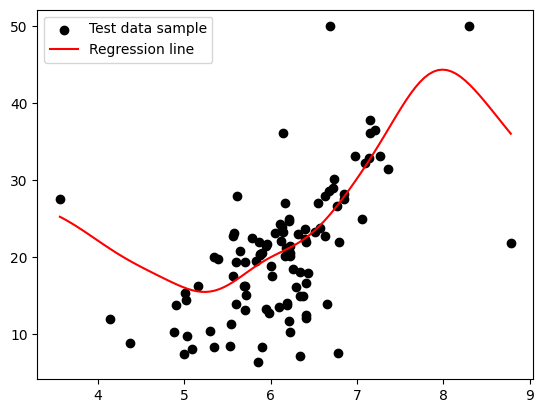

In [ ]:
# 결과의 시각화
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 100)  #x축에대한 데이터 만들기
line_y = svm_regr.predict(line_x.reshape(-1,1))  # y축에대한 데이터 만들기

plt.scatter(X_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample', 'Regression line'], loc = 'upper left')


In [ ]:
svm_regr = SVR(C=20)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2 : 0.4234


In [ ]:
# 적절한 C값 찾기

arr2 = np.arange(10000,25000)
print(arr2)
best_C = 0
best_r2 = 0

for c in arr2:  
  svm_regr = SVR(C=c)
  svm_regr.fit(X_train, y_train)
  y_pred = svm_regr.predict(X_test)
  
  temp_r2 = r2_score(y_test, y_pred)

  if best_r2 < temp_r2:
    best_C = c
    best_r2 = temp_r2

print('최적의 결과는 C={} r2={:.4f}'.format(best_C, best_r2))

[10000 10001 10002 ... 24997 24998 24999]


In [ ]:
# Multi Layer Perceptron Regressor 뉴럴네트워크를 이용

from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(solver='adam', hidden_layer_sizes=300, max_iter=200) 
# 문제를 해결하는 (solver)해결자로  lbfgs, sgd, *adam* 등등 있음
# layer값이 크다고 R2 score가 높아지는게 아님
# max_iter = 최대반복횟수를 제한걸어주는것, 이 값이 커질수록 나오는 결과값은 어느정도 일정해짐

mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)

print('다중 MLP 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀, R2: 0.4595
